In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
years = np.array([1900,1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980])
points = np.array([76212168, 92228496, 106021537, 123202624, 132164569,  151325798, 179323175,  203302031,  226542199])

actual_value = 248709873
difference_array = np.zeros(7)
AIC = np.zeros(7)

new_years = np.arange(1900, 1991, 1)
new_points = []
cooeficient_vector = []

In [3]:
def create_matrix(pow: int):
    matrix = np.zeros((9, pow+1))
    for i in range(len(years)):
        for j in range(pow+1):
            matrix[i][j] = (years[i] ** j)

    return matrix

In [4]:
def horner(L, x):
    i = len(L) - 1
    result = L[i]
    while i > 0:
        i = i - 1
        result = result*x + L[i]

    return result

In [5]:
color = ["lime","blue","hotpink","khaki","peru","silver","forestgreen"]

0.424
0.424
0.052
0.024
0.051
0.053
0.051


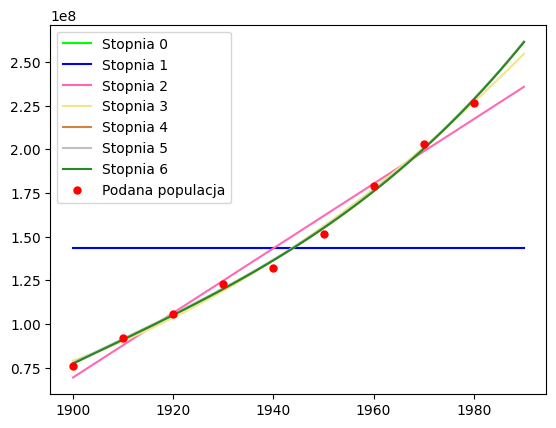

In [6]:
for i in range(0,7):
    p_matrix = create_matrix(i)
    cooeficient_vector.append(np.linalg.lstsq(p_matrix,points,rcond=-1)[0])
    new_points = [horner(cooeficient_vector[i-1], x) for x in new_years]

    difference_array[i] = np.abs(actual_value - new_points[90])/actual_value
    sqr_diff = [(new_points[10*i] - points[i])**2 for i in range(len(years))]

    k = i+1
    n = len(years)
    AIC[i] = 2*k*(k+1)/(n-k-1) + 2*k-k*np.ln(sum(sqr_diff))/k

    plt.plot(new_years,new_points,label="Stopnia "+ str(i),color=color[i])

# plt.scatter(years,points)
plt.plot(years, points, ".", markersize = 10, color = "red", label="Podana populacja")
plt.legend()

for i in difference_array:
    print("%.3f" % i)
